In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from metrics import *
import matplotlib.pyplot as plt
import shap
import seaborn as sns
from scipy.stats import linregress

/home/kamila/.pyenv/versions/3.9.0/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [2]:
df = pd.read_csv('novas_30_colunas.csv', encoding='ISO-8859-1')

In [3]:
df

,A006B_pais_incentiva_estudar,A013_ingressou_aos_8_ou_mais,A003E_outros_familiares_moram_cmg,A009E_2_tvs_em_casa,A010F_tem_microondas,A006D_familiar_incentiva_ir_as_aulas,A010H_tem_lavadora_roupas,A006A_pais_sempre_conversam_sobre_escola,A014_estudou_escola_publica_particular,A018C_nunca_le_quadrinhos,...,A010A_tem_tc_a_cabo,A017E_trabalha_mais_2_horas,A009G_nenhum_carro_casa,A009F_2_banheiro_casa,P082_,P004_trabalho_em_2_escolas,P034_nao_usa_projetor_multimidia,P022_sempre_assisto_telejornal,ID_ESCOLA,MEDIA_FINAL
0,0.196970,0.000000,0.090909,0.151515,0.409091,0.803030,0.969697,0.363636,0.045455,0.666667,...,0.257576,0.106061,0.560606,0.257576,0.000000,0.000000,0.000000,0.000000,11024968,309.865
1,0.190141,0.035211,0.147887,0.126761,0.500000,0.866197,0.957746,0.366197,0.021127,0.591549,...,0.338028,0.492958,0.535211,0.204225,0.312500,0.125000,0.187500,0.375000,11025638,269.215
2,0.071429,0.000000,0.142857,0.142857,0.607143,0.892857,1.000000,0.285714,0.035714,0.464286,...,0.357143,0.178571,0.642857,0.357143,0.000000,1.000000,0.000000,1.000000,11007168,273.965
3,0.160000,0.013333,0.146667,0.233333,0.460000,0.846667,0.953333,0.340000,0.233333,0.586667,...,0.366667,0.146667,0.353333,0.366667,0.000000,0.000000,0.000000,0.200000,11007885,302.270
4,0.178571,0.008929,0.138393,0.241071,0.477679,0.839286,0.941964,0.330357,0.133929,0.531250,...,0.303571,0.366071,0.410714,0.263393,0.095238,0.000000,0.095238,0.000000,11007893,278.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,0.208955,0.029851,0.164179,0.298507,0.671642,0.746269,0.880597,0.373134,0.164179,0.522388,...,0.373134,0.268657,0.328358,0.343284,0.500000,0.000000,0.000000,0.000000,53014308,298.720
10670,0.120000,0.000000,0.160000,0.380000,0.700000,0.800000,0.800000,0.240000,0.100000,0.420000,...,0.320000,0.220000,0.460000,0.360000,0.000000,0.000000,0.000000,0.000000,53014316,269.965
10671,0.288660,0.000000,0.288660,0.381443,0.721649,0.773196,0.886598,0.288660,0.154639,0.639175,...,0.443299,0.443299,0.329897,0.278351,0.375000,0.000000,0.250000,0.000000,53051009,297.660
10672,0.191257,0.038251,0.103825,0.311475,0.737705,0.923497,0.819672,0.300546,0.038251,0.497268,...,0.311475,0.245902,0.382514,0.333333,0.142857,0.000000,0.000000,0.000000,53068068,279.370


In [4]:
escolas_ids = [21110069, 23252669, 35295012, 35000942, 35046361, 35191905, 52020576, 52068749, 43065589, 42013771]

# Filtrar o DataFrame removendo as escolas da lista
df_filtered = df[~df['ID_ESCOLA'].isin(escolas_ids)]

df_drop = df_filtered.drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)

In [5]:
X = df_drop
y = df_filtered['MEDIA_FINAL']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
y_pred = xgb_model.predict(X_val)

In [7]:
error_metrics(y_val, xgb_model.predict(X_val))

RMSE:  143.8090828183491
Max error:  63.179515380859385
MAPE:  0.03409042848948194
R2:  0.6693547536870816
MAE:  9.267394266106185


In [8]:
# Criar um DataFrame para comparar previsões e valores reais
resultado = X_val.copy()
resultado['REAL'] = y_val.values
resultado['PRED'] = y_pred

resultado

,A006B_pais_incentiva_estudar,A013_ingressou_aos_8_ou_mais,A003E_outros_familiares_moram_cmg,A009E_2_tvs_em_casa,A010F_tem_microondas,A006D_familiar_incentiva_ir_as_aulas,A010H_tem_lavadora_roupas,A006A_pais_sempre_conversam_sobre_escola,A014_estudou_escola_publica_particular,A018C_nunca_le_quadrinhos,...,A010A_tem_tc_a_cabo,A017E_trabalha_mais_2_horas,A009G_nenhum_carro_casa,A009F_2_banheiro_casa,P082_,P004_trabalho_em_2_escolas,P034_nao_usa_projetor_multimidia,P022_sempre_assisto_telejornal,REAL,PRED
6834,0.180328,0.016393,0.049180,0.295082,0.622951,0.901639,0.852459,0.278689,0.016393,0.491803,...,0.459016,0.557377,0.262295,0.245902,0.200000,0.400000,0.0,0.400000,265.420,268.921906
9054,0.068966,0.034483,0.068966,0.241379,0.517241,0.896552,0.862069,0.379310,0.034483,0.482759,...,0.413793,0.586207,0.275862,0.241379,0.250000,0.000000,0.0,0.000000,283.210,270.156860
4082,0.363636,0.000000,0.045455,0.318182,0.363636,0.727273,0.681818,0.181818,0.000000,0.545455,...,0.454545,0.227273,0.590909,0.227273,1.000000,0.000000,0.0,0.000000,297.190,270.927612
3081,0.065217,0.000000,0.130435,0.173913,0.260870,0.804348,0.478261,0.260870,0.043478,0.369565,...,0.239130,0.152174,0.782609,0.065217,0.250000,0.500000,0.0,0.250000,234.245,236.778870
582,0.147826,0.000000,0.208696,0.165217,0.347826,0.817391,0.704348,0.286957,0.104348,0.452174,...,0.356522,0.486957,0.608696,0.217391,0.125000,0.000000,0.0,0.250000,265.485,261.279297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,0.233333,0.016667,0.083333,0.200000,0.500000,0.783333,0.766667,0.233333,0.416667,0.516667,...,0.300000,0.333333,0.766667,0.216667,0.000000,0.250000,0.0,0.000000,257.980,259.435059
6639,0.163934,0.032787,0.109290,0.393443,0.808743,0.765027,0.961749,0.371585,0.081967,0.508197,...,0.502732,0.393443,0.344262,0.245902,0.166667,0.000000,0.0,0.000000,274.890,269.494232
2494,0.071429,0.071429,0.309524,0.119048,0.238095,0.857143,0.357143,0.333333,0.071429,0.357143,...,0.238095,0.380952,0.785714,0.238095,1.000000,1.000000,0.0,0.000000,269.900,253.147049
4112,0.153846,0.012821,0.089744,0.320513,0.532051,0.865385,0.782051,0.346154,0.038462,0.602564,...,0.570513,0.583333,0.301282,0.294872,0.142857,0.285714,0.0,0.142857,284.110,275.962463


In [9]:
escolas_ids = [21110069, 23252669, 35295012, 35000942, 35046361, 35191905, 52020576, 52068749, 43065589, 42013771]
escolas = df[df['ID_ESCOLA'].isin(escolas_ids)]
escolas

,A006B_pais_incentiva_estudar,A013_ingressou_aos_8_ou_mais,A003E_outros_familiares_moram_cmg,A009E_2_tvs_em_casa,A010F_tem_microondas,A006D_familiar_incentiva_ir_as_aulas,A010H_tem_lavadora_roupas,A006A_pais_sempre_conversam_sobre_escola,A014_estudou_escola_publica_particular,A018C_nunca_le_quadrinhos,...,A010A_tem_tc_a_cabo,A017E_trabalha_mais_2_horas,A009G_nenhum_carro_casa,A009F_2_banheiro_casa,P082_,P004_trabalho_em_2_escolas,P034_nao_usa_projetor_multimidia,P022_sempre_assisto_telejornal,ID_ESCOLA,MEDIA_FINAL
1015,0.105960,0.033113,0.158940,0.178808,0.264901,0.880795,0.655629,0.238411,0.059603,0.384106,...,0.496689,0.344371,0.821192,0.178808,0.375000,0.250000,0.125,0.250000,21110069,254.975
1966,0.229167,0.000000,0.062500,0.229167,0.125000,0.770833,0.291667,0.312500,0.041667,0.416667,...,0.395833,0.291667,0.729167,0.208333,0.333333,0.000000,0.000,0.000000,23252669,305.510
7479,0.150000,0.000000,0.107143,0.335714,0.864286,0.742857,0.914286,0.392857,0.271429,0.514286,...,0.500000,0.128571,0.250000,0.307143,0.000000,0.125000,0.000,0.000000,35295012,335.105
8109,0.192982,0.017544,0.157895,0.377193,0.798246,0.850877,0.929825,0.482456,0.245614,0.500000,...,0.500000,0.149123,0.385965,0.342105,0.250000,0.000000,0.000,0.000000,35000942,291.915
8329,0.198276,0.017241,0.189655,0.396552,0.767241,0.836207,0.922414,0.258621,0.043103,0.422414,...,0.362069,0.413793,0.551724,0.215517,0.142857,0.285714,0.000,0.000000,35046361,281.780
8340,0.120000,0.020000,0.093333,0.366667,0.786667,0.820000,0.926667,0.240000,0.066667,0.493333,...,0.506667,0.453333,0.560000,0.286667,0.200000,0.300000,0.100,0.300000,35191905,239.070
9577,0.166667,0.000000,0.104167,0.458333,0.875000,0.854167,0.979167,0.250000,0.000000,0.666667,...,0.687500,0.833333,0.083333,0.395833,0.000000,1.000000,1.000,0.000000,42013771,278.000
9719,0.416667,0.000000,0.083333,0.250000,0.916667,0.833333,1.000000,0.250000,0.000000,0.916667,...,0.666667,0.416667,0.000000,0.583333,0.000000,1.000000,0.000,1.000000,43065589,295.785
10200,0.121053,0.002632,0.110526,0.278947,0.815789,0.855263,0.960526,0.450000,0.542105,0.602632,...,0.415789,0.292105,0.115789,0.434211,0.058824,0.058824,0.000,0.000000,52020576,335.505
10383,0.111429,0.008571,0.102857,0.297143,0.728571,0.828571,0.885714,0.442857,0.488571,0.568571,...,0.305714,0.460000,0.171429,0.442857,0.000000,0.090909,0.000,0.090909,52068749,291.820


In [10]:
X_escolas = escolas.drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)

pred = xgb_model.predict(X_escolas)
escolas['PRED'] = pred

/tmp/ipykernel_5681/524957430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escolas['PRED'] = pred


In [11]:
escolas[['ID_ESCOLA', 'MEDIA_FINAL', 'PRED']]

,ID_ESCOLA,MEDIA_FINAL,PRED
1015,21110069,254.975,249.233673
1966,23252669,305.510,281.033783
7479,35295012,335.105,316.613007
8109,35000942,291.915,313.749756
8329,35046361,281.780,274.347626
8340,35191905,239.070,258.128326
9577,42013771,278.000,285.262482
9719,43065589,295.785,267.863220
10200,52020576,335.505,330.002563
10383,52068749,291.820,288.314240


In [12]:
explainer = shap.Explainer(xgb_model, X_train)

shap_values = explainer(X_val)

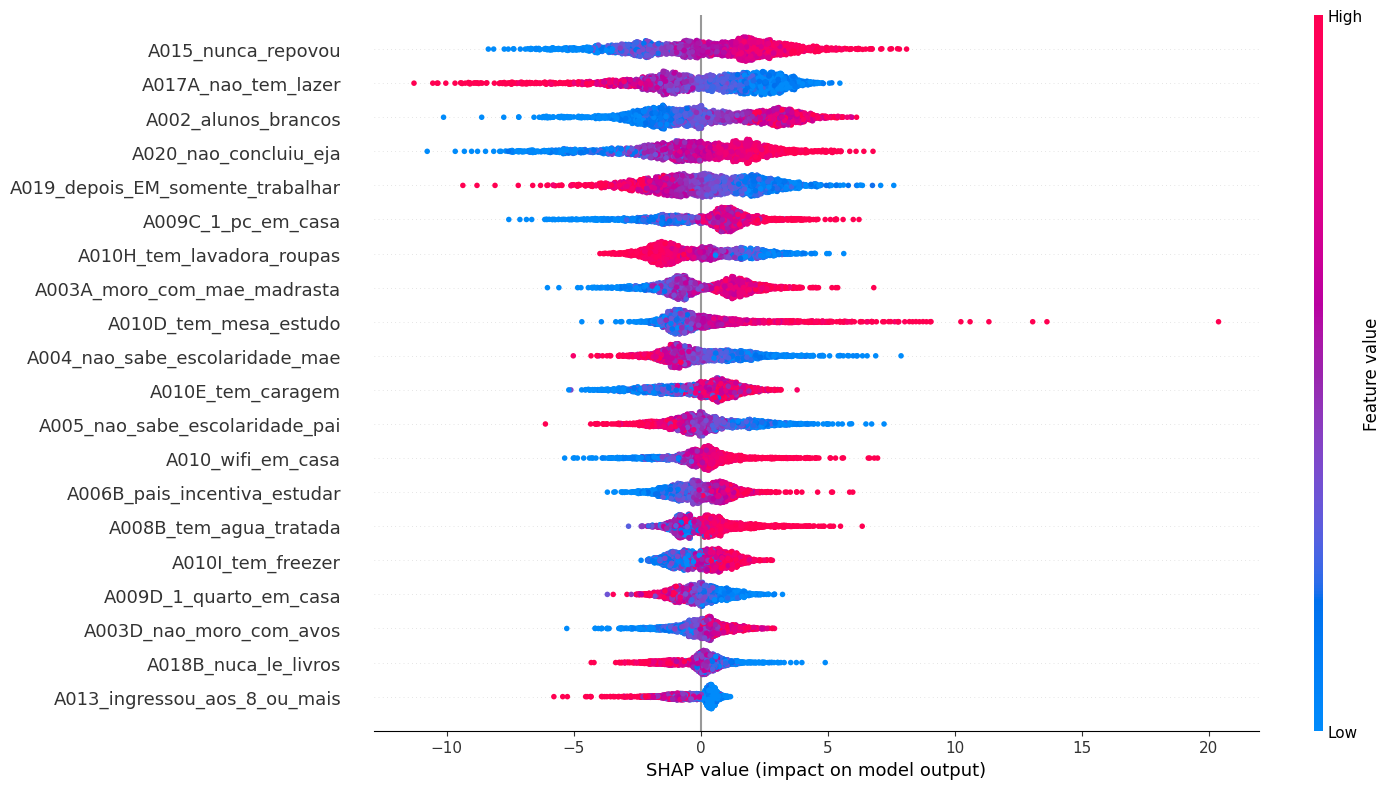

In [13]:
shap.summary_plot(shap_values, X_val, plot_size=[15,8])

In [14]:
schools_of_interest = [52020576]
df_schools = df[df['ID_ESCOLA'].isin(schools_of_interest)].drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)

shap_values_schools = explainer(df_schools)
shap_df_schools = pd.DataFrame(shap_values_schools.values, columns=df_schools.columns)
def get_sorted_shap_values(shap_df):
    return shap_df.abs().mean().sort_values(ascending=False)

shap_sorted_schools = get_sorted_shap_values(shap_df_schools)

print(shap_sorted_schools)

A010D_tem_mesa_estudo                               8.458152
A017D_mais_2_horas_estudando_fora_escola            5.876829
A005_nao_sabe_escolaridade_pai                      5.296527
A015_nunca_repovou                                  4.571681
A003A_moro_com_mae_madrasta                         4.415727
A010_wifi_em_casa                                   3.604676
A017A_nao_tem_lazer                                 3.097483
A010H_tem_lavadora_roupas                           2.900075
A002_alunos_brancos                                 2.869564
A019_depois_EM_somente_trabalhar                    2.829636
A014_estudou_escola_publica_particular              2.594304
A004_nao_sabe_escolaridade_mae                      2.451772
A009C_1_pc_em_casa                                  2.333413
A012_vai_para_escola_carro                          2.143877
A008B_tem_agua_tratada                              2.001871
A020_nao_concluiu_eja                               1.796639
A010E_tem_caragem       

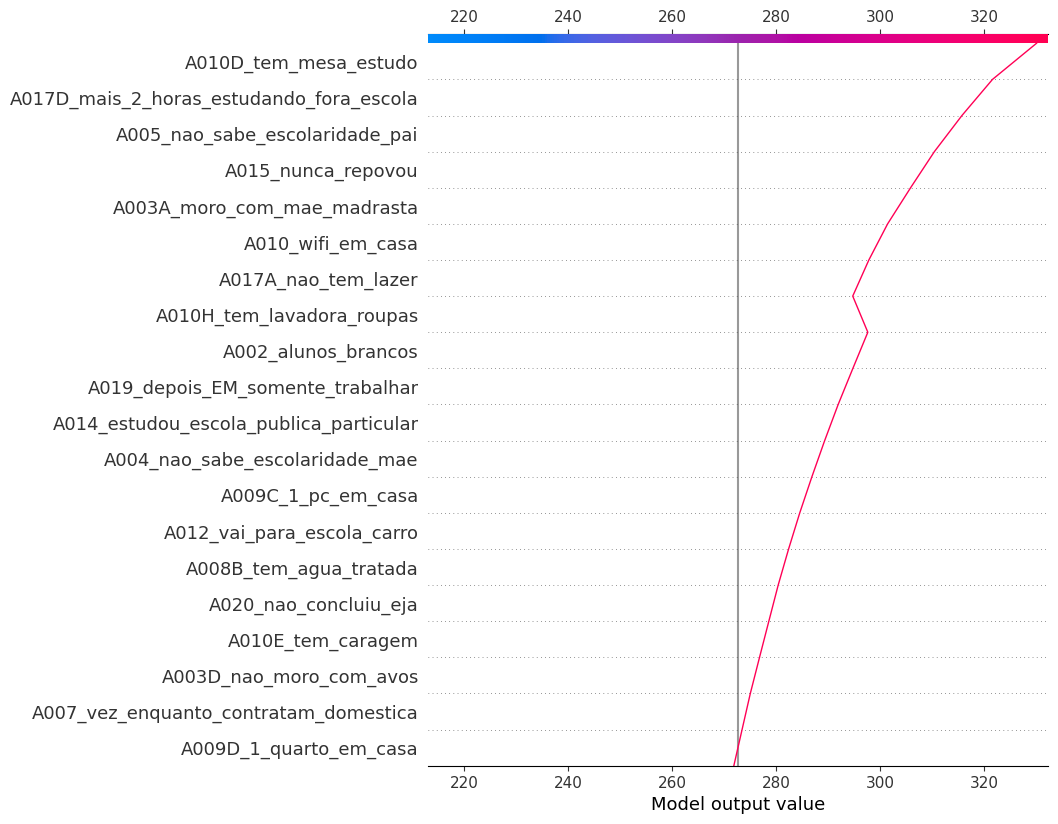

In [15]:
shap.decision_plot(explainer.expected_value, shap_values_schools.values[0], df_schools.columns)

In [16]:
schools_of_interest = [52068749]
df_schools = df[df['ID_ESCOLA'].isin(schools_of_interest)].drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)

shap_values_schools = explainer(df_schools)
shap_df_schools = pd.DataFrame(shap_values_schools.values, columns=df_schools.columns)
def get_sorted_shap_values(shap_df):
    return shap_df.abs().mean().sort_values(ascending=False)

shap_sorted_schools = get_sorted_shap_values(shap_df_schools)

print(shap_sorted_schools)

A015_nunca_repovou                                  3.424915
A017A_nao_tem_lazer                                 2.739437
A010E_tem_caragem                                   2.146899
A005_nao_sabe_escolaridade_pai                      2.095089
A008B_tem_agua_tratada                              2.054227
A019_depois_EM_somente_trabalhar                    1.820675
A010H_tem_lavadora_roupas                           1.424464
A006C_pais_vez_enquanto_incentivam_fazer_tarefas    1.416336
A004_nao_sabe_escolaridade_mae                      1.276618
A003A_moro_com_mae_madrasta                         1.238730
A009C_1_pc_em_casa                                  1.235310
A006B_pais_incentiva_estudar                        1.145961
A010_wifi_em_casa                                   1.032580
A020_nao_concluiu_eja                               0.913230
A017D_mais_2_horas_estudando_fora_escola            0.867883
P082_                                               0.754619
A016_nunca_abandonou_esc

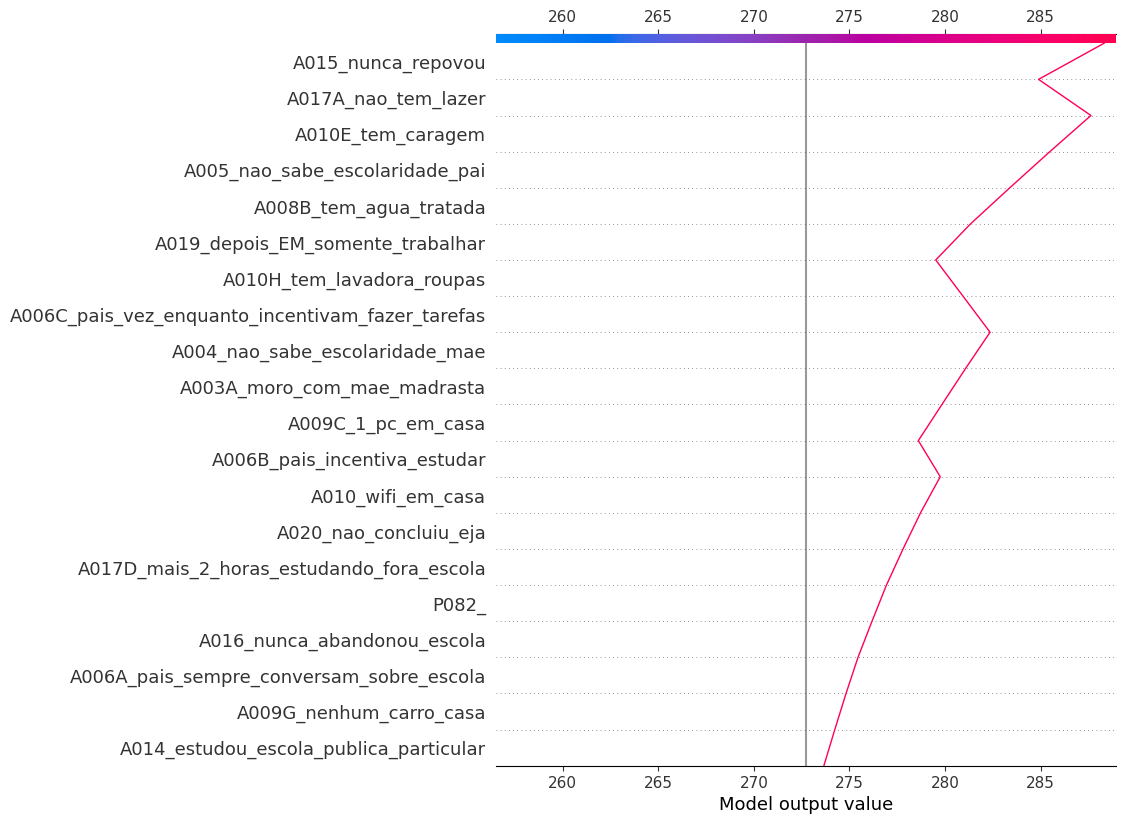

In [17]:
shap.decision_plot(explainer.expected_value, shap_values_schools.values[0], df_schools.columns)

In [18]:
schools_of_interest = [43065589]
df_schools = df[df['ID_ESCOLA'].isin(schools_of_interest)].drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)

shap_values_schools = explainer(df_schools)
shap_df_schools = pd.DataFrame(shap_values_schools.values, columns=df_schools.columns)
def get_sorted_shap_values(shap_df):
    return shap_df.abs().mean().sort_values(ascending=False)

shap_sorted_schools = get_sorted_shap_values(shap_df_schools)

print(shap_sorted_schools)

A006B_pais_incentiva_estudar                        3.814402
A002_alunos_brancos                                 3.761360
A017A_nao_tem_lazer                                 3.144707
A015_nunca_repovou                                  2.834216
A005_nao_sabe_escolaridade_pai                      2.439238
A010_wifi_em_casa                                   2.311738
A009C_1_pc_em_casa                                  2.084584
A004_nao_sabe_escolaridade_mae                      2.061326
A008C_iluminacao_minha_rua_ok                       1.994982
A018B_nuca_le_livros                                1.877463
A010H_tem_lavadora_roupas                           1.707514
A003A_moro_com_mae_madrasta                         1.636723
A010C_quarto_so_meu                                 1.606913
A009B_1_tablet_em_casa                              1.552585
A020_nao_concluiu_eja                               1.257368
A006A_pais_sempre_conversam_sobre_escola            1.244194
A009F_2_banheiro_casa   

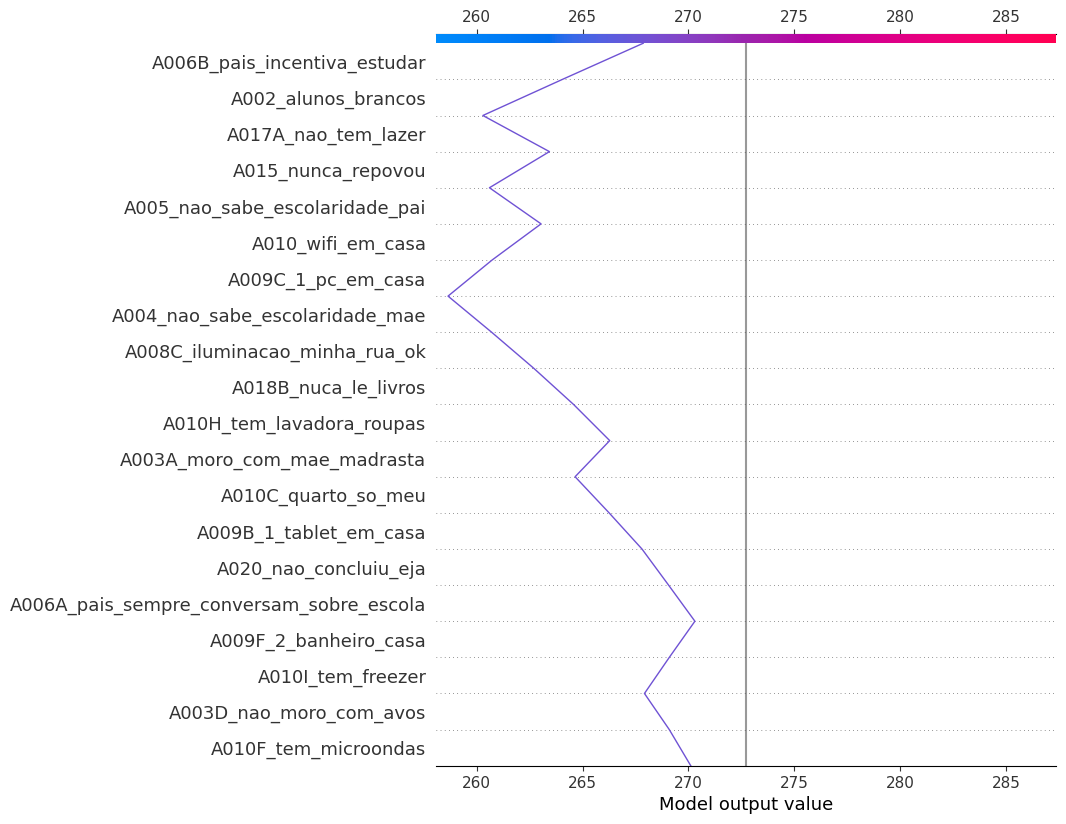

In [19]:
shap.decision_plot(explainer.expected_value, shap_values_schools.values[0], df_schools.columns)

In [20]:
schools_of_interest = [42013771]
df_schools = df[df['ID_ESCOLA'].isin(schools_of_interest)].drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)

shap_values_schools = explainer(df_schools)
shap_df_schools = pd.DataFrame(shap_values_schools.values, columns=df_schools.columns)
def get_sorted_shap_values(shap_df):
    return shap_df.abs().mean().sort_values(ascending=False)

shap_sorted_schools = get_sorted_shap_values(shap_df_schools)

print(shap_sorted_schools)

A015_nunca_repovou                                  4.644860
A002_alunos_brancos                                 4.070980
A017A_nao_tem_lazer                                 3.036836
A018B_nuca_le_livros                                2.508339
A020_nao_concluiu_eja                               2.401677
A010H_tem_lavadora_roupas                           2.343619
A004_nao_sabe_escolaridade_mae                      2.262192
A010E_tem_caragem                                   1.768395
A010D_tem_mesa_estudo                               1.574433
A009C_1_pc_em_casa                                  1.563970
A019_depois_EM_somente_trabalhar                    1.557846
P034_nao_usa_projetor_multimidia                    1.204429
A009B_1_tablet_em_casa                              1.104918
A010F_tem_microondas                                1.094223
A003A_moro_com_mae_madrasta                         1.081624
A014_estudou_escola_publica_particular              0.996644
A009F_2_banheiro_casa   

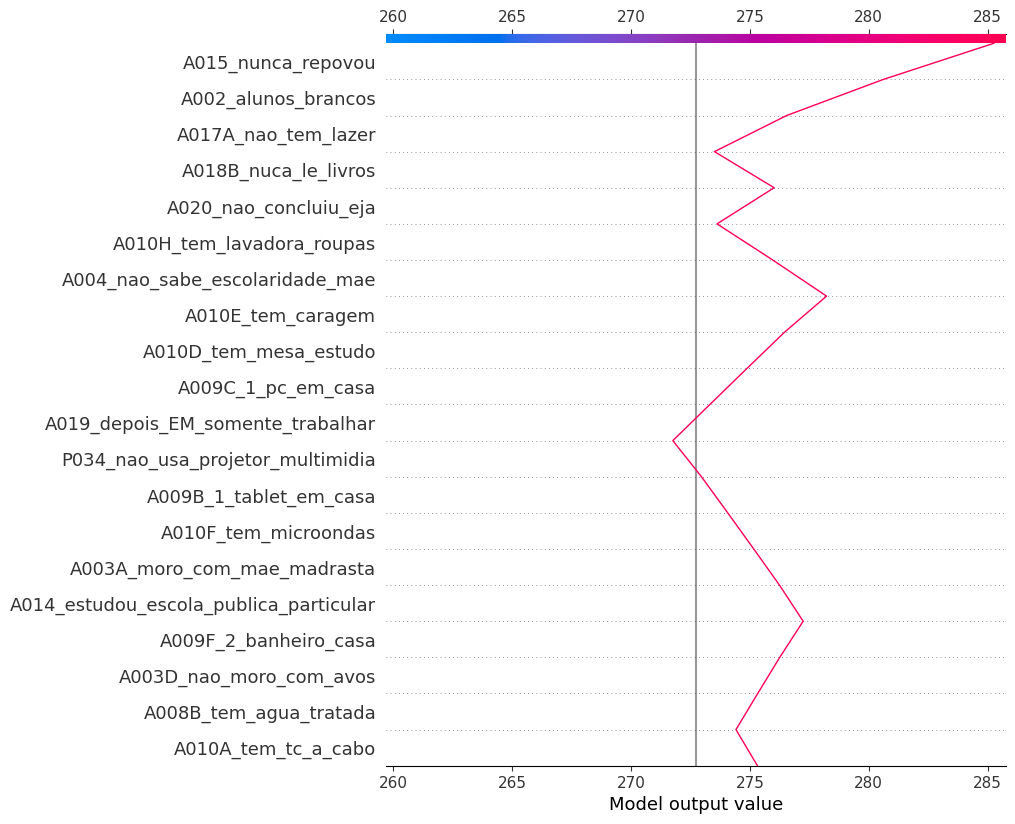

In [21]:
shap.decision_plot(explainer.expected_value, shap_values_schools.values[0], df_schools.columns)

#### Escolas com características semelhantes e notas diferentes: **52020576, 52068749**

#### Escolas com caracteristicas diferentes e notas semelhantes: **43065589, 42013771** 

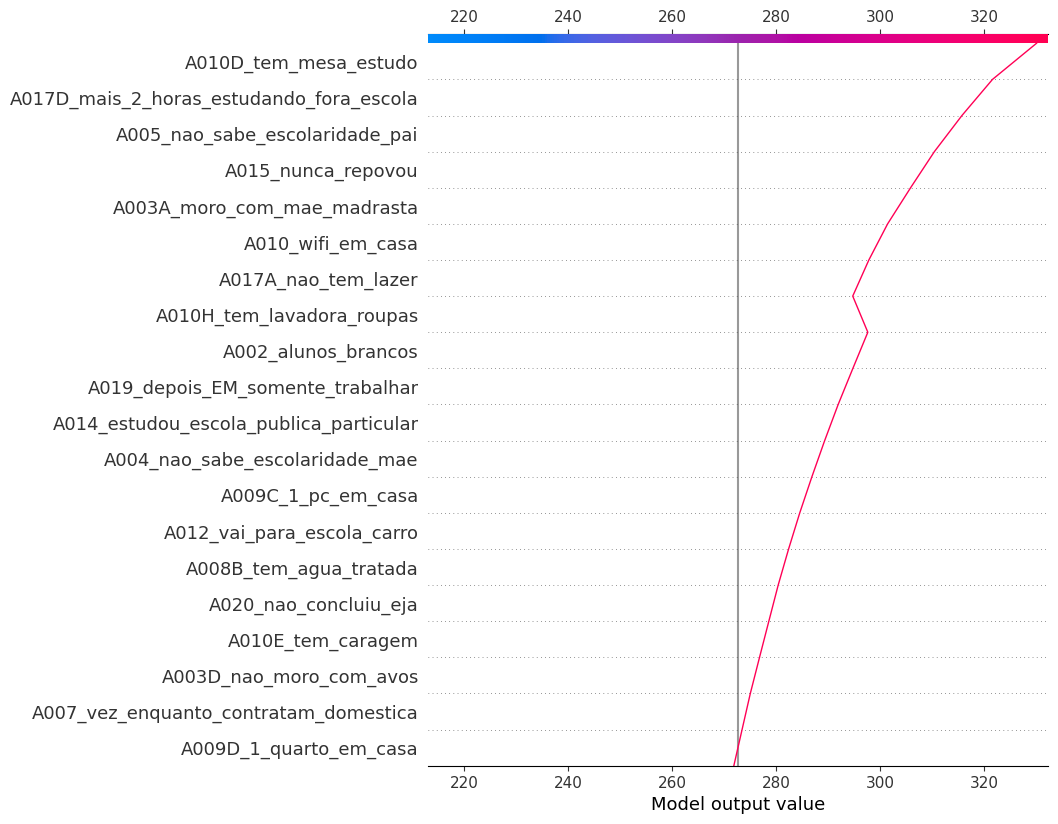

In [22]:
escola_id = 52020576
escola_data = df[df['ID_ESCOLA'] == escola_id]

X_escola = escola_data.drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)
X_escola = X_escola.reset_index(drop=True)

shap_values_escola = explainer(X_escola)
shap.decision_plot(explainer.expected_value, shap_values_escola.values[0], X_escola.columns)

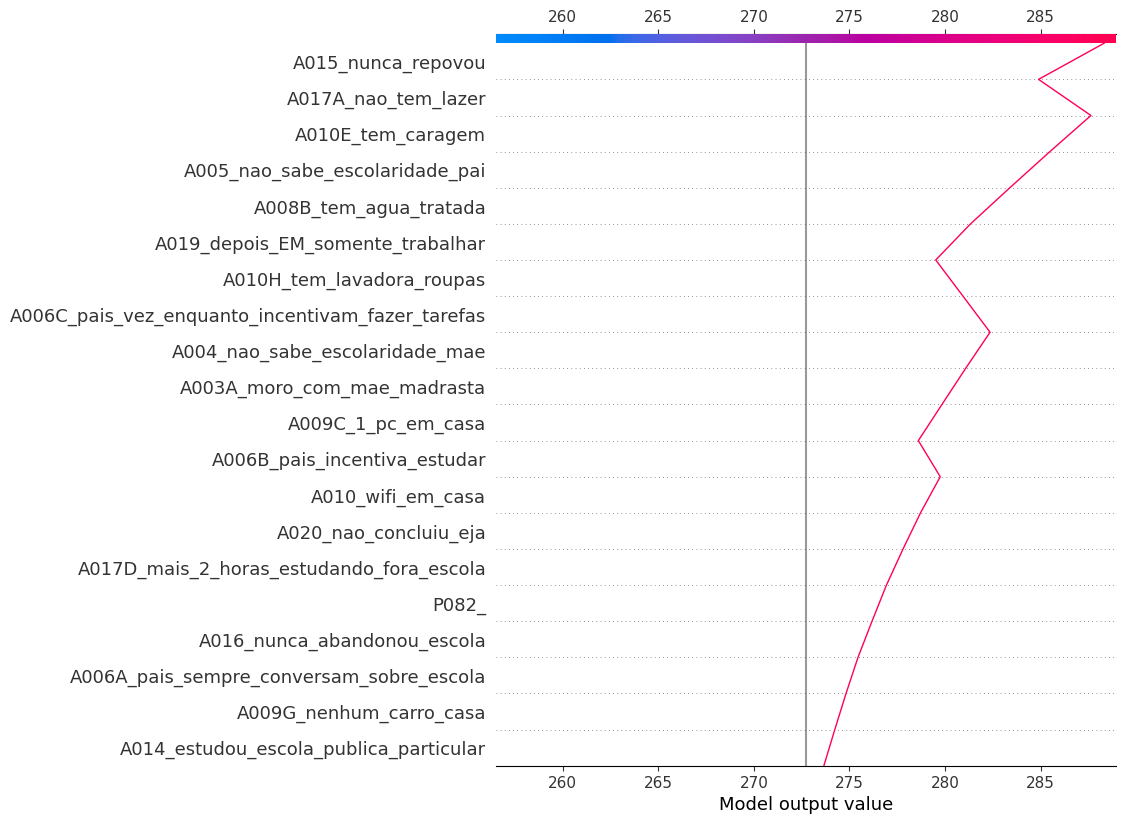

In [23]:
escola_id = 52068749
escola_data = df[df['ID_ESCOLA'] == escola_id]

X_escola = escola_data.drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)
X_escola = X_escola.reset_index(drop=True)

shap_values_escola = explainer(X_escola)
shap.decision_plot(explainer.expected_value, shap_values_escola.values[0], X_escola.columns)

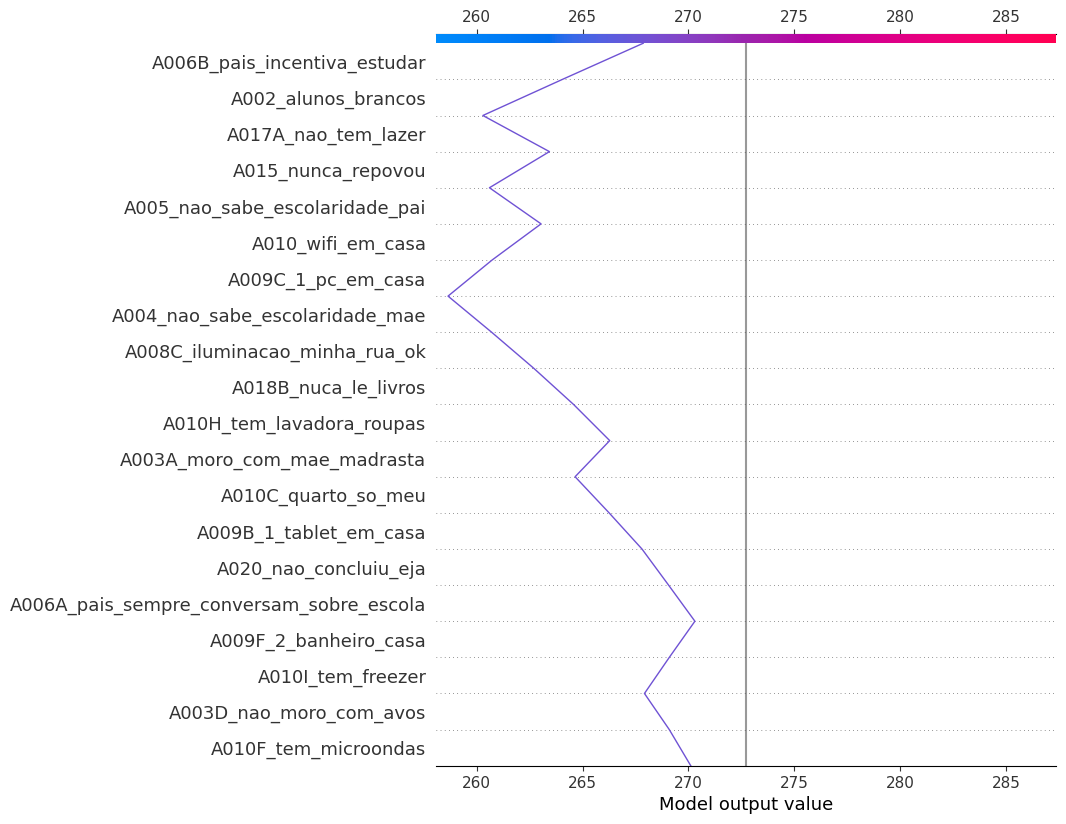

In [24]:
escola_id = 43065589
escola_data = df[df['ID_ESCOLA'] == escola_id]

X_escola = escola_data.drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)
X_escola = X_escola.reset_index(drop=True)

shap_values_escola = explainer(X_escola)
shap.decision_plot(explainer.expected_value, shap_values_escola.values[0], X_escola.columns)

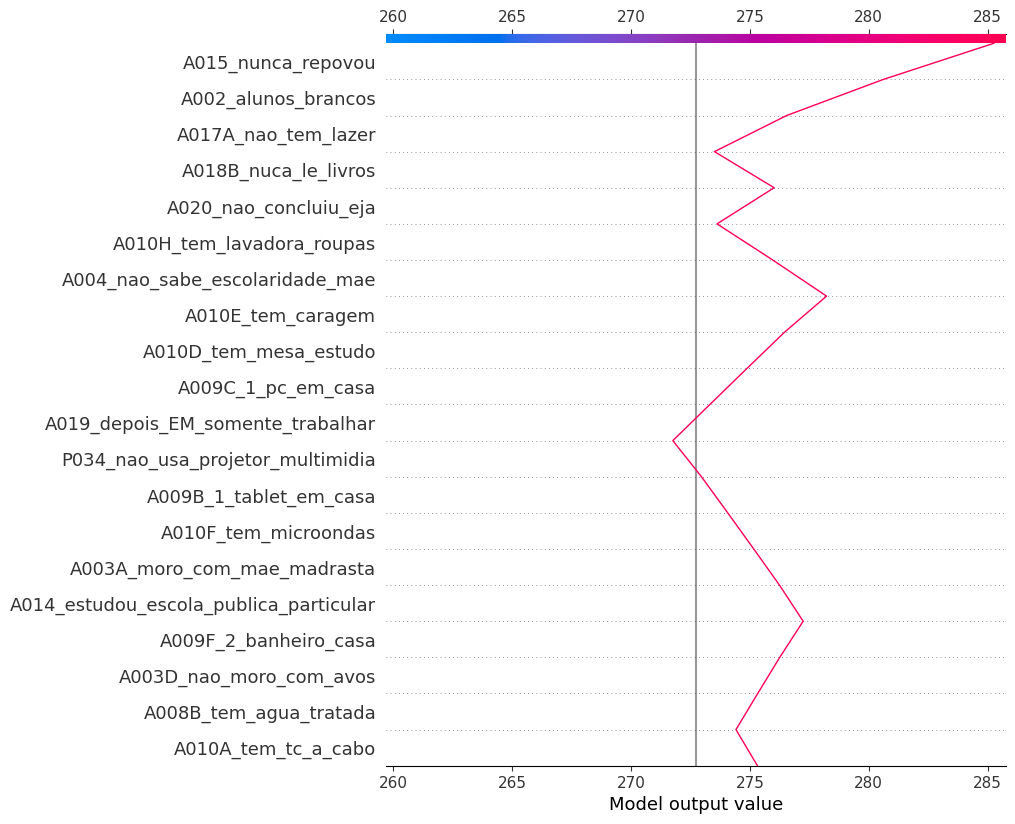

In [25]:
escola_id = 42013771
escola_data = df[df['ID_ESCOLA'] == escola_id]

X_escola = escola_data.drop(['MEDIA_FINAL', 'ID_ESCOLA'], axis=1)
X_escola = X_escola.reset_index(drop=True)

shap_values_escola = explainer(X_escola)
shap.decision_plot(explainer.expected_value, shap_values_escola.values[0], X_escola.columns)